In [196]:
import numpy as np
import pandas as pd
from scipy.stats import ncx2, chi2
from scipy.spatial import distance
import matplotlib.pyplot as plt


In [106]:
ncx2.ppf(0.10, df, nc)

13.91485603543482

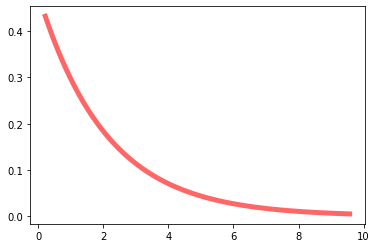

In [118]:
fig, ax = plt.subplots(1, 1)
df, nc = 2, 2/25
x = np.linspace(ncx2.ppf(0.10, df, nc), ncx2.ppf(0.99, df, nc), 100)
ax.plot(x, ncx2.pdf(x, df, nc),
       'r-', lw=5, alpha=0.6, label='ncx2 pdf')

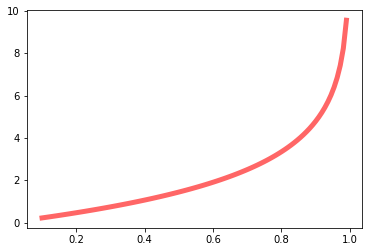

In [119]:
fig, ax = plt.subplots(1, 1)
q = np.linspace(0.10, 0.99, 100)
ax.plot(q, ncx2.ppf(q, df, nc),
       'r', lw=5, alpha=0.6, label='ncx2 quantile')

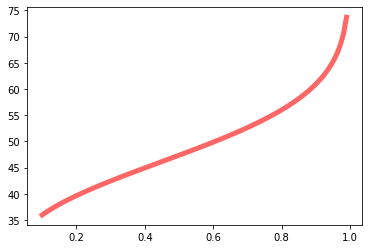

In [126]:
fig, ax = plt.subplots(1, 1)
N = 25
D = 2
df = (N-1)*D
q = np.linspace(0.10, 0.99, 100)
ax.plot(q, chi2.ppf(q, df),
       'r', lw=5, alpha=0.6, label='X2 quantile')

In [2]:
#Read data
data = pd.read_csv("./iris.data", header=None)
data = data.drop([0, 1], axis=1) #Only intersted in cols 3 & 4

In [3]:
data 

,2,3,4
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [5]:
#Get normal class data
idx = data.index[data[4] == 'Iris-versicolor'].tolist()
data_Versicolor = data.loc[idx]
data_Versicolor = data_Versicolor.drop([4], axis=1) #drop the label 

In [6]:
#Split into sets
trn_data = data_Versicolor[0:25]
tst_data = data_Versicolor[25:50]

In [7]:
trn_data.sum(axis=0).values

array([107.8,  33.6])

In [97]:
u = computeMean(trn_data)
print("Estimated mean vector:")
print(u.reshape((2,1)))

Estimated mean vector:
[[4.312]
 [1.344]]


In [98]:
C = computeCov(trn_data, u)
print('Estimated Covariance matrix:')
print(C)
# trn_data.values[0]

Estimated Covariance matrix:
[[0.189056 0.061472]
 [0.061472 0.040864]]


In [151]:
tolerance_radius(0.1, 0.9, 25, 2)
# N*D*ncx2.ppf(0.1, 2, 0.08)

1.7465107135094782

In [150]:
def tolerance_radius(p, gamma, N, D):
    df_cnx2 = D
    df_x2 = (N-1)*D
    nc = D/N #Non centrality param
    return np.sqrt(N*D*ncx2.ppf(p, df_cnx2, nc)/(chi2.ppf(p, df_x2)*(1-gamma)))


In [206]:
mahalanobis_dist(trn_data.values[0], u, C)

1.0159124062962064

In [204]:

def mahalanobis_dist(x, u, C):
    C_inv = np.linalg.inv(C)
    y = (x-u).reshape((1,2))
    i = y.dot(C_inv)
    return float(np.sqrt(i.dot(y.T)))


[1.4 1.5 1.5 1.3 1.5 1.3 1.6 1.3 1.4 1.5 1.4 1.4 1.5 1.5 1.1 1.3 1.5 1.3]
(18, 2)


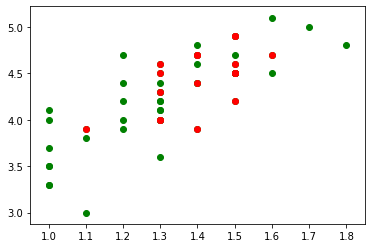

In [226]:
R = np.empty((0,2), float)

N = 25
D = 2
gamma = 0.9
p = 0.1
for n in range(N):
    # print(trn_data.values[n])
    x = trn_data.values[n]
    if (mahalanobis_dist(x, u, C) <= tolerance_radius(p, gamma, N, D)):
        x = x.reshape((1,2))
        R = np.append(R, x, axis=0)

print(R[:,1])
print(R.shape)
# fig, ax = plt.subplots(1, 1)
# ax.plot(R[:,0], R[:,1])

plt.scatter(data_Versicolor.values[:,1], data_Versicolor.values[:,0], c='g')
plt.scatter(R[:,1], R[:,0], c='r')
plt.show()

Assuming that the data is MVG distributed. We can use MLE to estimate the parameters of the MVG. We know that solving the MLE for the MVG parameters we find:
$$
\begin{equation*}
\hat{\mu}_{MLE} \equiv \hat{\mu}\\
\hat{C}_{MLE} \equiv \hat{C}\\
\end{equation*}
$$
Then we can compute $\hat{\mu}_{MLE}$ as:
$$
\hat{\mu}_{MLE} = \frac{1}{N}\sum_{n=1}^{N}\overrightarrow{x_n}
$$

In [8]:
def computeMean(X):
    N = X.shape[0]
    mean = trn_data.sum(axis=0).values/N
    return mean


In [81]:
# X = trn_data.values
# u = u.reshape((2,1))
# uuT = u*(u.T)
# N = X.shape[0]
# cn = np.zeros((2, 2))
# for n in range(N):
#     x = X[n]
#     # print(x)
#     x = x.reshape((2, 1))
#     # print(x)
#     # print(x.T)
#     # print(x*(x.T))
#     cn += x*(x.T) - uuT
#     # print(cn)


In [92]:
def computeCov(X, u):
    X = X.values
    u = u.reshape((2,1))
    uuT = u*(u.T)
    N = X.shape[0]
    cn = np.zeros((2, 2))
    for n in range(N):
        x = X[n]
        x = x.reshape((2, 1))
        cn += x*(x.T) - uuT
    return cn/N

    